<a href="https://colab.research.google.com/github/Jorgecuenca1/Tps_ProcesamientoLenguajeNatural/blob/main/6c_QaBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## QA BOT
Ejemplo basado en [LINK](https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/)

In [1]:
import re

import numpy as np
import pandas as pd

import tensorflow as tf
from keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SimpleRNN
from keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input

In [2]:
# Descargar la carpeta de dataset
import os
import gdown
if os.access('data_volunteers.json', os.F_OK) is False:
    url = 'https://drive.google.com/uc?id=1awUxYwImF84MIT5-jCaYAPe2QwSgS1hN&export=download'
    output = 'data_volunteers.json'
    gdown.download(url, output, quiet=False)
else:
    print("El dataset ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1awUxYwImF84MIT5-jCaYAPe2QwSgS1hN&export=download
To: /content/data_volunteers.json
100%|██████████| 2.58M/2.58M [00:00<00:00, 154MB/s]


In [3]:
# dataset_file
import json

text_file = "data_volunteers.json"
with open(text_file) as f:
    data = json.load(f) # la variable data será un diccionario



In [4]:
# Observar los campos disponibles en cada linea del dataset
data[0].keys()

dict_keys(['dialog', 'start_time', 'end_time', 'bot_profile', 'user_profile', 'eval_score', 'profile_match', 'participant1_id', 'participant2_id'])

In [5]:
chat_in = []
chat_out = []

input_sentences = []
output_sentences = []
output_sentences_inputs = []
max_len = 30
import re

def clean_text(txt):
    txt = txt.lower()
    txt = txt.replace("\'d", " had")
    txt = txt.replace("\'s", " is")
    txt = txt.replace("\'m", " am")
    txt = txt.replace("don't", "do not")
    txt = re.sub(r'\W+', ' ', txt)

    return txt

# Preguntas y respuestas adicionales
additional_data = [
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you read?',
        'answer': 'Yes.'
    },
    {
        'question': 'Do you have any pets?',
        'answer': 'Yes.'
    },
    {
        'question': 'Where are you from?',
        'answer': 'I am from Colombia.'
    }
]

# Agregar preguntas y respuestas adicionales al conjunto de datos existente
for data_item in data:
    for i in range(len(data_item['dialog'])-1):
        chat_in = clean_text(data_item['dialog'][i]['text'])
        chat_out = clean_text(data_item['dialog'][i+1]['text'])

        if len(chat_in) >= max_len or len(chat_out) >= max_len:
            continue

        input_sentence, output = chat_in, chat_out

        # Output sentence (decoder_output) tiene <eos>
        output_sentence = output + ' <eos>'
        # Output sentence input (decoder_input) tiene <sos>
        output_sentence_input = '<sos> ' + output

        input_sentences.append(input_sentence)
        output_sentences.append(output_sentence)
        output_sentences_inputs.append(output_sentence_input)

# Agregar preguntas y respuestas adicionales al conjunto de datos
for data_item in additional_data:
    chat_in = clean_text(data_item['question'])
    chat_out = clean_text(data_item['answer'])

    if len(chat_in) >= max_len or len(chat_out) >= max_len:
        continue

    input_sentence, output = chat_in, chat_out

    # Output sentence (decoder_output) tiene <eos>
    output_sentence = output + ' <eos>'
    # Output sentence input (decoder_input) tiene <sos>
    output_sentence_input = '<sos> ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("Cantidad de rows utilizadas:", len(input_sentences))
for i in range(len(input_sentences)):
    print("Pregunta:", input_sentences[i])
    print("Respuesta:", output_sentences[i])
    print()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Respuesta: do you like cats i do do you  <eos>

Pregunta: do you like cats i do do you 
Respuesta: i like dogs more <eos>

Pregunta: i love tacos
Respuesta: wow golden medal great <eos>

Pregunta: who is your fav else 
Respuesta: tacos are good i like cats  <eos>

Pregunta: tacos are good i like cats 
Respuesta: good <eos>

Pregunta: good
Respuesta:   <eos>

Pregunta:  
Respuesta: do you own any hats i ve one  <eos>

Pregunta:  ohky
Respuesta: are u bot  <eos>

Pregunta: oh nice
Respuesta: hlo <eos>

Pregunta: hlo
Respuesta: hello how are you today  <eos>

Pregunta: hello how are you today 
Respuesta: hi i am well  <eos>

Pregunta: hi i am well 
Respuesta: good u <eos>

Pregunta: good u
Respuesta: k <eos>

Pregunta: hi
Respuesta: hi <eos>

Pregunta: hi
Respuesta: hello how are you  <eos>

Pregunta: hello how are you 
Respuesta: i am fine u <eos>

Pregunta: where r u from
Respuesta: i live in ny how about you  <eos>

Pre

In [6]:
input_sentences[0], output_sentences[0], output_sentences_inputs[0]

('hello ', 'hi how are you  <eos>', '<sos> hi how are you ')

### 2 - Preprocesamiento

In [7]:
# Definir el tamaño máximo del vocabulario
MAX_VOCAB_SIZE = 8000
# Vamos a necesitar un tokenizador para cada idiom

In [8]:
# Tokenizar las palabras con el Tokenizer de Keras
# Definir una máxima cantidad de palabras a utilizar:
# - num_words --> the maximum number of words to keep, based on word frequency.
# - Only the most common num_words-1 words will be kept.
from keras.preprocessing.text import Tokenizer

# tokenizador de inglés
input_tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print("Palabras en el vocabulario:", len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Sentencia de entrada más larga:", max_input_len)

Palabras en el vocabulario: 1783
Sentencia de entrada más larga: 9


In [9]:
# tokenizador de español
# A los filtros de símbolos del Tokenizer agregamos el "¿",
# sacamos los "<>" para que no afectar nuestros tokens
output_tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, filters='!"#$%&()*+,-./:;=¿?@[\\]^_`{|}~\t\n')
output_tokenizer.fit_on_texts(["<sos>", "<eos>"] + output_sentences)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print("Palabras en el vocabulario:", len(word2idx_outputs))

num_words_output = min(len(word2idx_outputs) + 1, MAX_VOCAB_SIZE)
# Se suma 1 para incluir el token de palabra desconocida

max_out_len = max(len(sen) for sen in output_integer_seq)
print("Sentencia de salida más larga:", max_out_len)

Palabras en el vocabulario: 1795
Sentencia de salida más larga: 10


Como era de esperarse, las sentencias en castellano son más largas que en inglés, y lo mismo sucede con su vocabulario.

In [10]:
# Por una cuestion de que no explote la RAM se limitará el tamaño de las sentencias de entrada
# a la mitad:
max_input_len = 16
max_out_len = 18

A la hora de realiza padding es importante tener en cuenta que en el encoder los ceros se agregan al comienzo y en el decoder al final. Esto es porque la salida del encoder está basado en las últimas palabras de la sentencia (son las más importantes), mientras que en el decoder está basado en el comienzo de la secuencia de salida ya que es la realimentación del sistema y termina con fin de sentencia.

In [11]:
print("Cantidad de rows del dataset:", len(input_integer_seq))

encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences shape:", encoder_input_sequences.shape)

decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences shape:", decoder_input_sequences.shape)

Cantidad de rows del dataset: 6122
encoder_input_sequences shape: (6122, 16)
decoder_input_sequences shape: (6122, 18)


La última capa del modelo (softmax) necesita que los valores de salida
del decoder (decoder_sequences) estén en formato oneHotEncoder.\
Se utiliza "decoder_output_sequences" con la misma estrategia con que se transformó la entrada del decoder.

In [12]:
from keras.utils.np_utils import to_categorical
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
decoder_targets = to_categorical(decoder_output_sequences, num_classes=num_words_output)
decoder_targets.shape

(6122, 18, 1796)

### 3 - Preparar los embeddings

In [13]:
# Descargar los embeddings desde un google drive (es la forma más rápida)
# NOTA: No hay garantía de que estos links perduren, en caso de que no estén
# disponibles descargar de la página oficial como se explica en el siguiente bloque de código
import os
import gdown
if os.access('gloveembedding.pkl', os.F_OK) is False:
    url = 'https://drive.google.com/uc?id=1KY6avD5I1eI2dxQzMkR3WExwKwRq2g94&export=download'
    output = 'gloveembedding.pkl'
    gdown.download(url, output, quiet=False)
else:
    print("Los embeddings gloveembedding.pkl ya están descargados")

Downloading...
From: https://drive.google.com/uc?id=1KY6avD5I1eI2dxQzMkR3WExwKwRq2g94&export=download
To: /content/gloveembedding.pkl
100%|██████████| 525M/525M [00:03<00:00, 173MB/s]


In [14]:
# En caso de que gdown de algún error de permisos intentar descargar los
# embeddings con curl:

!curl -L -o 'gloveembedding.pkl' 'https://drive.google.com/u/0/uc?id=1KY6avD5I1eI2dxQzMkR3WExwKwRq2g94&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  500M  100  500M    0     0   172M      0  0:00:02  0:00:02 --:--:--  188M


In [15]:
import logging
import os
from pathlib import Path
from io import StringIO
import pickle

class WordsEmbeddings(object):
    logger = logging.getLogger(__name__)

    def __init__(self):
        # load the embeddings
        words_embedding_pkl = Path(self.PKL_PATH)
        if not words_embedding_pkl.is_file():
            words_embedding_txt = Path(self.WORD_TO_VEC_MODEL_TXT_PATH)
            assert words_embedding_txt.is_file(), 'Words embedding not available'
            embeddings = self.convert_model_to_pickle()
        else:
            embeddings = self.load_model_from_pickle()
        self.embeddings = embeddings
        # build the vocabulary hashmap
        index = np.arange(self.embeddings.shape[0])
        # Dicctionarios para traducir de embedding a IDX de la palabra
        self.word2idx = dict(zip(self.embeddings['word'], index))
        self.idx2word = dict(zip(index, self.embeddings['word']))

    def get_words_embeddings(self, words):
        words_idxs = self.words2idxs(words)
        return self.embeddings[words_idxs]['embedding']

    def words2idxs(self, words):
        return np.array([self.word2idx.get(word, -1) for word in words])

    def idxs2words(self, idxs):
        return np.array([self.idx2word.get(idx, '-1') for idx in idxs])

    def load_model_from_pickle(self):
        self.logger.debug(
            'loading words embeddings from pickle {}'.format(
                self.PKL_PATH
            )
        )
        max_bytes = 2**28 - 1 # 256MB
        bytes_in = bytearray(0)
        input_size = os.path.getsize(self.PKL_PATH)
        with open(self.PKL_PATH, 'rb') as f_in:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f_in.read(max_bytes)
        embeddings = pickle.loads(bytes_in)
        self.logger.debug('words embeddings loaded')
        return embeddings

    def convert_model_to_pickle(self):
        # create a numpy strctured array:
        # word     embedding
        # U50      np.float32[]
        # word_1   a, b, c
        # word_2   d, e, f
        # ...
        # word_n   g, h, i
        self.logger.debug(
            'converting and loading words embeddings from text file {}'.format(
                self.WORD_TO_VEC_MODEL_TXT_PATH
            )
        )
        structure = [('word', np.dtype('U' + str(self.WORD_MAX_SIZE))),
                     ('embedding', np.float32, (self.N_FEATURES,))]
        structure = np.dtype(structure)
        # load numpy array from disk using a generator
        with open(self.WORD_TO_VEC_MODEL_TXT_PATH, encoding="utf8") as words_embeddings_txt:
            embeddings_gen = (
                (line.split()[0], line.split()[1:]) for line in words_embeddings_txt
                if len(line.split()[1:]) == self.N_FEATURES
            )
            embeddings = np.fromiter(embeddings_gen, structure)
        # add a null embedding
        null_embedding = np.array(
            [('null_embedding', np.zeros((self.N_FEATURES,), dtype=np.float32))],
            dtype=structure
        )
        embeddings = np.concatenate([embeddings, null_embedding])
        # dump numpy array to disk using pickle
        max_bytes = 2**28 - 1 # # 256MB
        bytes_out = pickle.dumps(embeddings, protocol=pickle.HIGHEST_PROTOCOL)
        with open(self.PKL_PATH, 'wb') as f_out:
            for idx in range(0, len(bytes_out), max_bytes):
                f_out.write(bytes_out[idx:idx+max_bytes])
        self.logger.debug('words embeddings loaded')
        return embeddings


class GloveEmbeddings(WordsEmbeddings):
    WORD_TO_VEC_MODEL_TXT_PATH = 'glove.twitter.27B.50d.txt'
    PKL_PATH = 'gloveembedding.pkl'
    N_FEATURES = 50
    WORD_MAX_SIZE = 60

class FasttextEmbeddings(WordsEmbeddings):
    WORD_TO_VEC_MODEL_TXT_PATH = 'cc.en.300.vec'
    PKL_PATH = 'fasttext.pkl'
    N_FEATURES = 300
    WORD_MAX_SIZE = 60

In [16]:
# Por una cuestion de RAM se utilizarán los embeddings de Glove de dimension 50
model_embeddings = GloveEmbeddings()

In [17]:
# Crear la Embedding matrix de las secuencias
# en inglés

print('preparing embedding matrix...')
embed_dim = model_embeddings.N_FEATURES
words_not_found = []

# word_index provieen del tokenizer

nb_words = min(MAX_VOCAB_SIZE, len(word2idx_inputs)) # vocab_size
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word2idx_inputs.items():
    if i >= nb_words:
        continue
    embedding_vector = model_embeddings.get_words_embeddings(word)[0]
    if (embedding_vector is not None) and len(embedding_vector) > 0:

        embedding_matrix[i] = embedding_vector
    else:
        # words not found in embedding index will be all-zeros.
        words_not_found.append(word)

print('number of null word embeddings:', np.sum(np.sum(embedding_matrix**2, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 38


In [18]:
# Dimensión de los embeddings de la secuencia en inglés
embedding_matrix.shape

(1783, 50)

### 4 - Entrenar el modelo

In [19]:
max_input_len

16

In [20]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

n_units = 128

# define training encoder
encoder_inputs = Input(shape=(max_input_len))

#encoder_embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

encoder_embedding_layer = Embedding(
          input_dim=nb_words,  # definido en el Tokenizador
          output_dim=embed_dim,  # dimensión de los embeddings utilizados
          input_length=max_input_len, # tamaño máximo de la secuencia de entrada
          weights=[embedding_matrix],  # matrix de embeddings
          trainable=False)      # marcar como layer no entrenable

encoder_inputs_x = encoder_embedding_layer(encoder_inputs)

encoder = LSTM(n_units, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs_x)
encoder_states = [state_h, state_c]

# define training decoder
decoder_inputs = Input(shape=(max_out_len))
decoder_embedding_layer = Embedding(input_dim=num_words_output, output_dim=n_units, input_length=max_out_len)
decoder_inputs_x = decoder_embedding_layer(decoder_inputs)

decoder_lstm = LSTM(n_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

# Dense
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 16, 50)       89150       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 18, 128)      229888      ['input_2[0][0]']                
                                                                                              

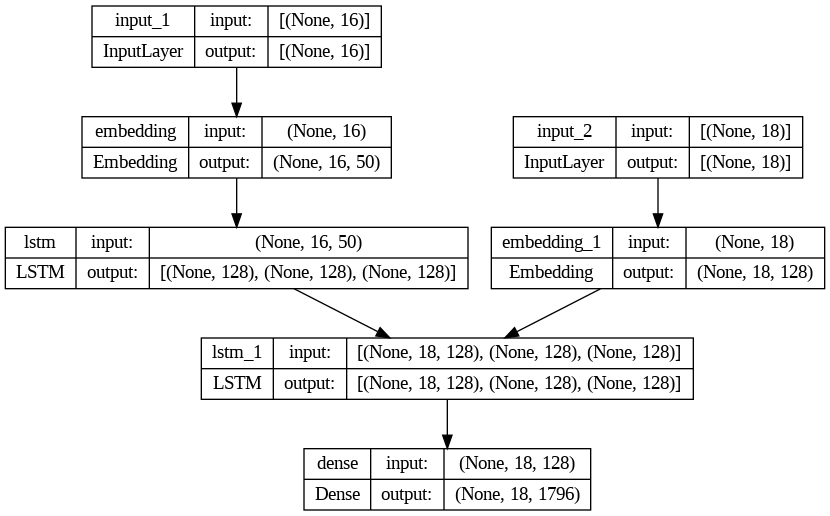

In [21]:
# Modelo completo (encoder+decoder) para poder entrenar
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

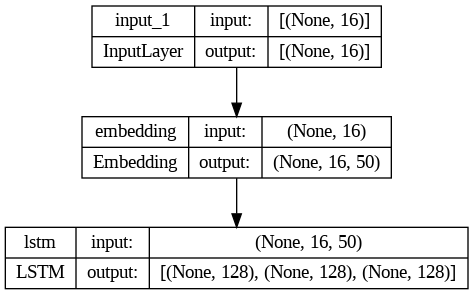

In [22]:
# Modelo solo encoder

# define inference encoder
encoder_model = Model(encoder_inputs, encoder_states)

from keras.utils.vis_utils import plot_model
plot_model(encoder_model, to_file='encoder_plot.png', show_shapes=True, show_layer_names=True)

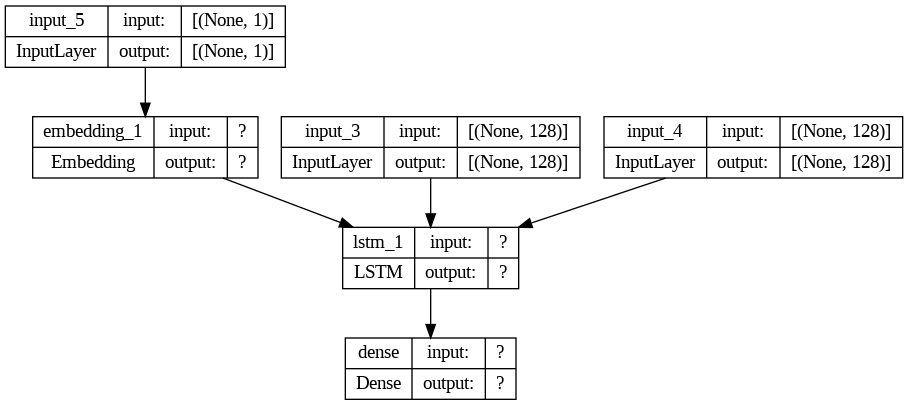

In [23]:
# Modelo solo decoder (para realizar inferencia)
from keras.utils.vis_utils import plot_model

# define inference decoder
decoder_state_input_h = Input(shape=(n_units,))
decoder_state_input_c = Input(shape=(n_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# En cada predicción habrá una sola palabra de entrada al decoder,
# que es la realimentación de la palabra anterior
# por lo que hay que modificar el input shape de la layer de Embedding
decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding_layer(decoder_inputs_single)

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs_single] + decoder_states_inputs, [decoder_outputs] + decoder_states)

plot_model(decoder_model, to_file='decoder_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
hist = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets,
    epochs=1000,
    validation_split=0.2)

Epoch 1/1000
154/154 [==============================] - 19s 66ms/step - loss: 2.0858 - accuracy: 0.7237 - val_loss: 1.1917 - val_accuracy: 0.8048
Epoch 2/1000
154/154 [==============================] - 3s 18ms/step - loss: 1.1774 - accuracy: 0.7887 - val_loss: 1.0865 - val_accuracy: 0.8205
Epoch 3/1000
154/154 [==============================] - 3s 16ms/step - loss: 1.0623 - accuracy: 0.8093 - val_loss: 1.0144 - val_accuracy: 0.8364
Epoch 4/1000
154/154 [==============================] - 3s 17ms/step - loss: 0.9593 - accuracy: 0.8345 - val_loss: 0.9646 - val_accuracy: 0.8456
Epoch 5/1000
154/154 [==============================] - 2s 15ms/step - loss: 0.8921 - accuracy: 0.8445 - val_loss: 0.9321 - val_accuracy: 0.8486
Epoch 6/1000
154/154 [==============================] - 2s 13ms/step - loss: 0.8435 - accuracy: 0.8485 - val_loss: 0.9087 - val_accuracy: 0.8440
Epoch 7/1000
154/154 [==============================] - 2s 14ms/step - loss: 0.8078 - accuracy: 0.8520 - val_loss: 0.8896 - val_a

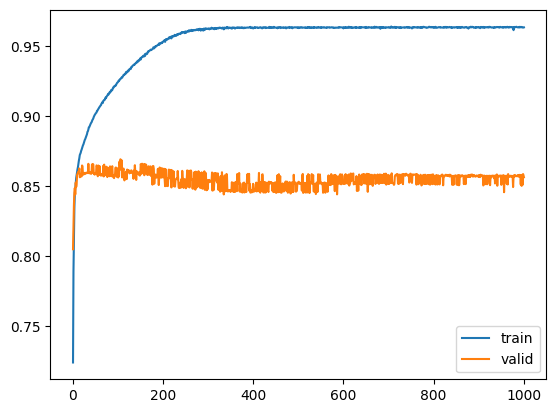

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

### 5 - Inferencia

In [26]:
'''
Step 1:
A deal is a deal -> Encoder -> enc(h1,c1)

enc(h1,c1) + <sos> -> Decoder -> Un + dec(h1,c1)

step 2:
dec(h1,c1) + Un -> Decoder -> trato + dec(h2,c2)

step 3:
dec(h2,c2) + trato -> Decoder -> es + dec(h3,c3)

step 4:
dec(h3,c3) + es -> Decoder -> un + dec(h4,c4)

step 5:
dec(h4,c4) + un -> Decoder -> trato + dec(h5,c5)

step 6:
dec(h5,c5) + trato. -> Decoder -> <eos> + dec(h6,c6)
'''

'\nStep 1:\nA deal is a deal -> Encoder -> enc(h1,c1)\n\nenc(h1,c1) + <sos> -> Decoder -> Un + dec(h1,c1)\n\nstep 2:\ndec(h1,c1) + Un -> Decoder -> trato + dec(h2,c2)\n\nstep 3:\ndec(h2,c2) + trato -> Decoder -> es + dec(h3,c3)\n\nstep 4:\ndec(h3,c3) + es -> Decoder -> un + dec(h4,c4)\n\nstep 5:\ndec(h4,c4) + un -> Decoder -> trato + dec(h5,c5)\n\nstep 6:\ndec(h5,c5) + trato. -> Decoder -> <eos> + dec(h6,c6)\n'

In [27]:
# Armar los conversores de índice a palabra:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [28]:
def translate_sentence(input_seq):
    # Se transforma la sequencia de entrada a los estados "h" y "c" de la LSTM
    # para enviar la primera vez al decoder
    states_value = encoder_model.predict(input_seq)

    # Se inicializa la secuencia de entrada al decoder como "<sos>"
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']

    # Se obtiene el índice que finaliza la inferencia
    eos = word2idx_outputs['<eos>']

    output_sentence = []
    for _ in range(max_out_len):
        # Predicción del próximo elemento
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        # Si es "end of sentece <eos>" se acaba
        if eos == idx:
            break

        # Transformar idx a palabra
        word = ''
        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        # Actualizar los estados dada la última predicción
        states_value = [h, c]

        # Actualizar secuencia de entrada con la salida (re-alimentación)
        target_seq[0, 0] = idx

    return ' '.join(output_sentence)

In [29]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', translation)

1/1 [==============================] - 0s 33ms/step
-
Input: hey
Response: hello how are you


In [30]:
input_test = "where are you from?"
print('Input:', input_test)
integer_seq_test = input_tokenizer.texts_to_sequences([input_test])[0]
print("Representacion en vector de tokens de ids", integer_seq_test)
encoder_sequence_test = pad_sequences([integer_seq_test], maxlen=max_input_len)
print("Padding del vector:", encoder_sequence_test)

print('Input:', input_test)
translation = translate_sentence(encoder_sequence_test)
print('Response:', translation)

Input: where are you from?
Representacion en vector de tokens de ids [47, 8, 1, 37]
Padding del vector: [[ 0  0  0  0  0  0  0  0  0  0  0  0 47  8  1 37]]
Input: where are you from?
1/1 [==============================] - 0s 35ms/step
Response: i am from russia and you


In [31]:
input_test = "Do you have any pet?"
print('Input:', input_test)
integer_seq_test = input_tokenizer.texts_to_sequences([input_test])[0]
print("Representacion en vector de tokens de ids", integer_seq_test)
encoder_sequence_test = pad_sequences([integer_seq_test], maxlen=max_input_len)
print("Padding del vector:", encoder_sequence_test)

print('Input:', input_test)
translation = translate_sentence(encoder_sequence_test)
print('Response:', translation)

Input: Do you have any pet?
Representacion en vector de tokens de ids [3, 1, 17, 29, 252]
Padding del vector: [[  0   0   0   0   0   0   0   0   0   0   0   3   1  17  29 252]]
Input: Do you have any pet?
1/1 [==============================] - 0s 32ms/step
Response: yes i have


In [32]:
input_test = "Do you read?"
print('Input:', input_test)
integer_seq_test = input_tokenizer.texts_to_sequences([input_test])[0]
print("Representacion en vector de tokens de ids", integer_seq_test)
encoder_sequence_test = pad_sequences([integer_seq_test], maxlen=max_input_len)
print("Padding del vector:", encoder_sequence_test)

print('Input:', input_test)
translation = translate_sentence(encoder_sequence_test)
print('Response:', translation)

Input: Do you read?
Representacion en vector de tokens de ids [3, 1, 16]
Padding del vector: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  1 16]]
Input: Do you read?
1/1 [==============================] - 0s 25ms/step
Response: yes


### 6 - Conclusión
A primera vista parece que el modelo tendría que funcionar muy bien por el accuracy alcanzado. La realidad es que las respuestas en algunos casos tienen sentido pienso yo que con un dataset mas grande va mejorar.\
